In [ ]:
!pip install xgboost
!pip install imbalanced-learn
!pip install category_encoders

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

#Trong bài này, ta sẽ dùng category_encoders thay vì label_encoders
import category_encoders as ce

#Mô hình XG Boost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

#Mô hình Random Forrest
from sklearn.ensemble import RandomForestClassifier

#SMOTE
from imblearn.over_sampling import SMOTE

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Customer-Churn-Prediction/Train-Customer-Churn-Prediction.csv')
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no



**GIẢI THÍCH DỮ LIỆU:**

**1.state:** Địa chỉ

**2.account_length:** Số ngày tính từ khi  mở tài khoản.

**3.area_code:** Mã vùng điện thoại.

**4.international_plan:** Có đăng ký gói cước quốc tế không

**5.voice_mail_plan:** Có đăng ký gói cước thoại hộp thư không

**6.number_vmail_messages:** Số lượng tin nhắn thoại trong hộp thư.

**7.total_day_minutes:** Số phút sử dụng ban ngày.

**8.total_day_calls:** Số cuộc gọi ban ngày.

**9.total_day_charge:** Chi phí sử dụng ban ngày.

**10.total_eve_minutes:** Số phút dùng buổi tối.

**11.total_eve_calls:** Số cuộc gọi buổi tối.

**12.total_eve_charge:** Chi phí sử dụng buổi tối.

**13.total_night_minutes:** Số phút trong đêm.

**14.total_night_calls:** Số cuộc gọi trong đêm.

**15.total_night_charge:** Chi phí sử dụng ban đêm.

**16.total_intl_minutes:** Số phút để gọi quốc tế.

**17.total_intl_calls:** Số cuộc gọi quốc tế.

**18.total_intl_charge:** Chi phí sử dụng để gọi quốc tế.

**19.number_customer_service_calls:** Số lần gọi điều tra về dịch vụ khách hàng.

**20.churn:** Đầu ra xem khách hàng đã rời bỏ dịch vụ (churn) hay không (yes or no).*


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
obj_cols = data.select_dtypes(include=['object']).columns
for i in obj_cols:
  print(data[i].value_counts())
  print('\n')

state
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: count, dtype: int64


area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: count, dtype: int64


international_plan
no     3854
yes     396
Name: count, dtype: int64


voice_mail_plan
no     3138
yes    1112
Name: count, dtype: int64


churn
no     3652
yes     598
Name: count, dtype: int64




In [7]:
num_cols = data.select_dtypes(exclude=['object']).columns
for i in num_cols:
  print(data[i].value_counts())
  print('\n')

account_length
90     53
87     51
93     50
105    48
100    48
       ..
191     1
243     1
199     1
215     1
202     1
Name: count, Length: 215, dtype: int64


number_vmail_messages
0     3139
31      69
28      58
24      57
29      57
33      55
27      54
26      53
30      47
32      47
25      46
23      40
22      38
34      36
38      35
39      35
21      35
35      34
37      32
36      31
20      29
19      25
40      22
41      18
42      17
18      16
17      16
16      15
43      13
15      12
45      10
12      10
46       7
14       7
44       7
48       4
47       4
10       4
13       3
49       3
6        2
50       2
11       2
8        2
4        1
52       1
Name: count, dtype: int64


total_day_minutes
189.3    10
180.0     9
154.0     8
177.1     8
184.5     8
         ..
289.8     1
268.8     1
27.0      1
213.1     1
170.0     1
Name: count, Length: 1843, dtype: int64


total_day_calls
105    101
95      97
110     92
94      92
112     90
      ... 
30  

**A.EDA**

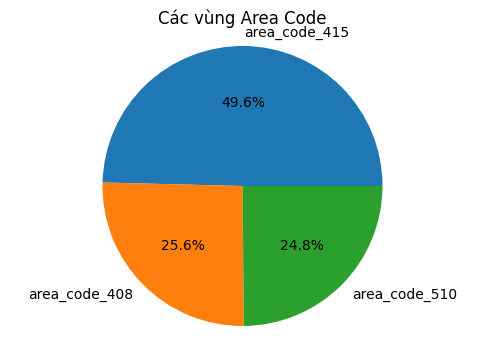

In [8]:
area_types = data['area_code'].value_counts()
area_total = area_types.sum() # Tính tổng số tội phạm

# Tính phần trăm cho từng loại tội phạm
crime_types_pct = area_types / area_total * 100

# Tạo biểu đồ hình tròn
fig, ax = plt.subplots(figsize=(6,4))
ax.pie(area_types.values, labels = area_types.index, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Các vùng Area Code')

plt.show()

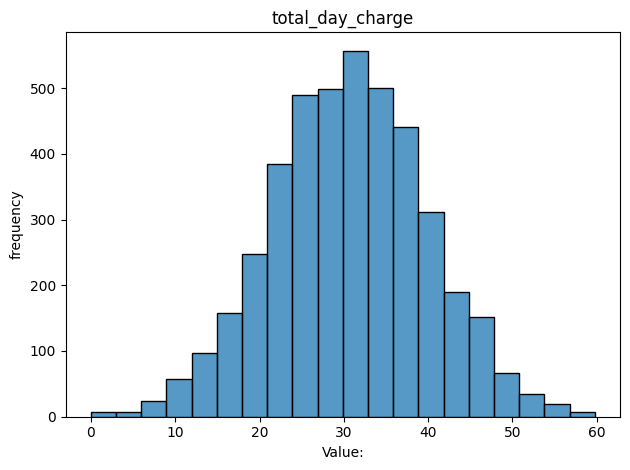

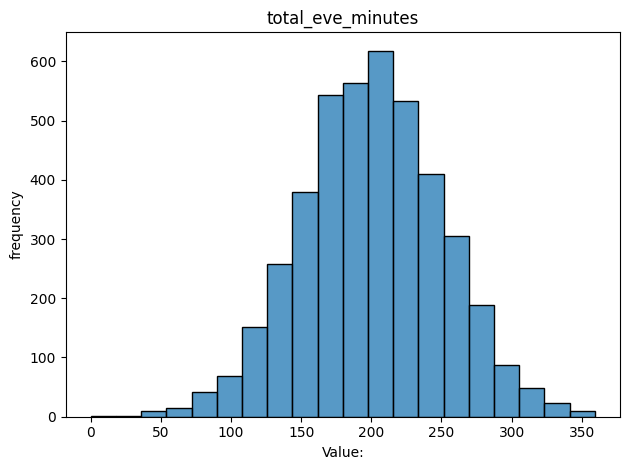

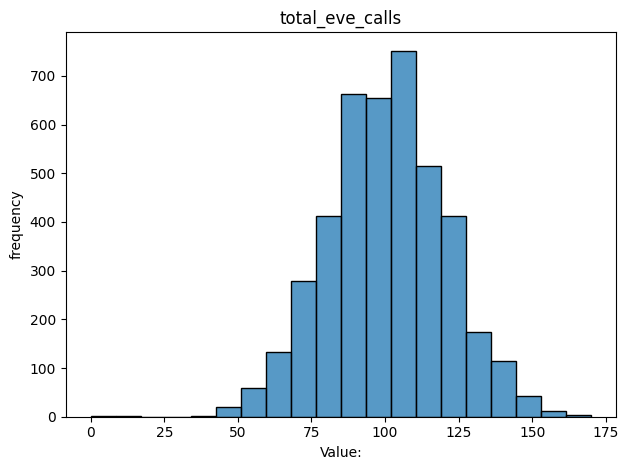

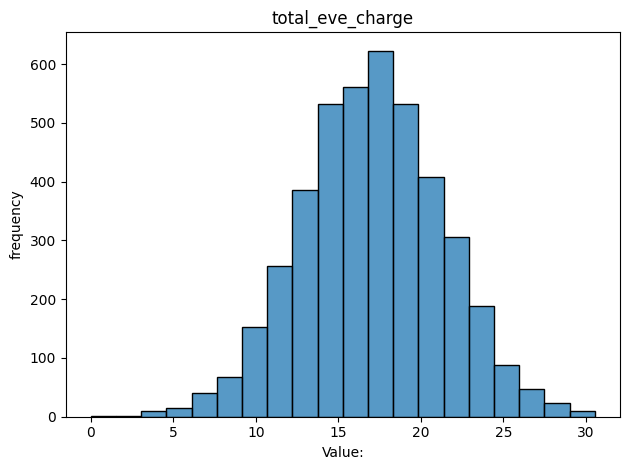

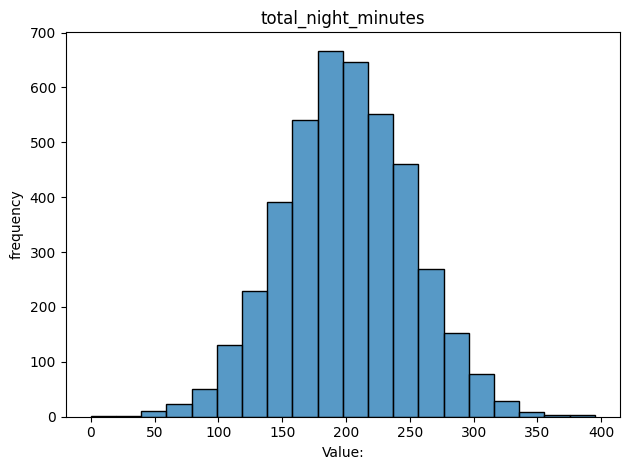

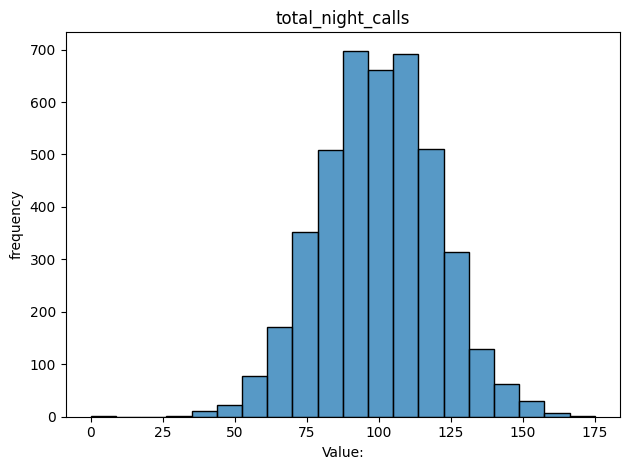

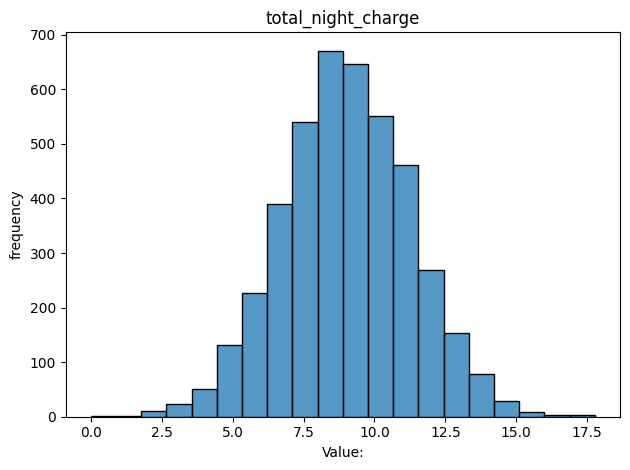

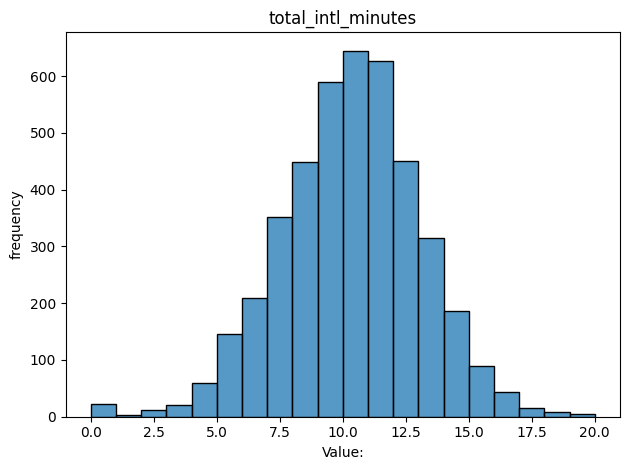

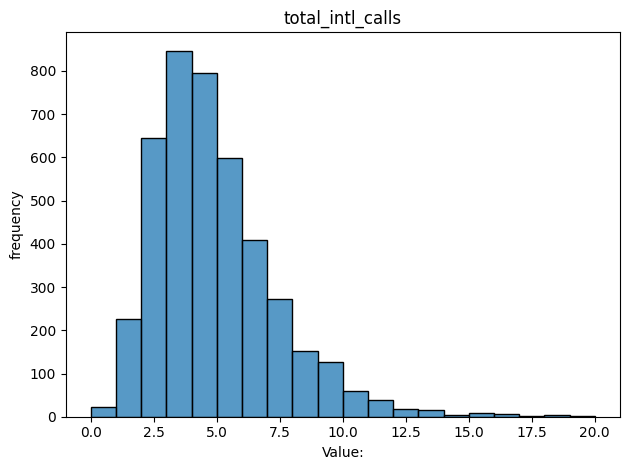

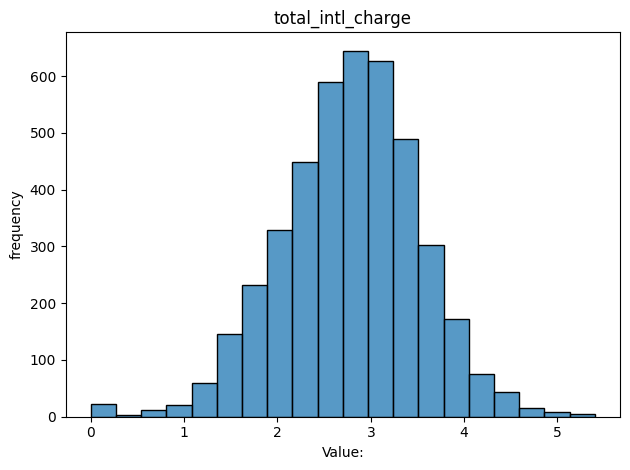

In [9]:
his_list = ['total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
            'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']

for i in his_list:
  plt.figsize = (10,5)
  ax = sns.histplot(data[i], bins=20, edgecolor='black')
  ax.set_xlabel('Value:')
  ax.set_ylabel('frequency')
  ax.set_title(i)

  plt.tight_layout()
  plt.show()

**B.DATA PREPROCESSING**

***Label Encoding cho column 'state'***

In [10]:
#Ánh xạ thủ công cho cột 'state'
#Lý do phải ánh xạ mang tính thủ công, bởi lẽ ánh xạ tự động sẽ khiến các giá trị 'state' bị lộn xộn, giảm hiệu suất
state_mapping = {"WV": 0, "MN": 1, "ID": 2, "AL": 3, "VA": 4, "OR": 5, "TX": 6, "UT": 7, "NY": 8, "NJ": 9,
                     "WY": 10, "OH": 11, "WI": 12, "MA": 13, "ME": 14, "CT": 15, "RI": 16, "MI": 17, "KS": 18,
                     "MD": 19, "VT": 20, "KY": 21, "NV": 22, "IN": 23, "MS": 24, "WA": 25, "NC": 26, "MO": 27,
                     "DE": 28, "CO": 29, "MT": 30, "IL": 31, "TN": 32, "NM": 33, "OK": 34, "NH": 35, "HI": 36,
                     "AZ": 37, "FL": 38, "SD": 39, "NE": 40, "DC": 41, "SC": 42, "AR": 43, "LA": 44, "PA": 45,
                     "ND": 46, "GA": 47, "IA": 48, "AK": 49, "CA": 50}
data['state'] = data['state'].map(state_mapping)

In [11]:
#Viết một hàm dùng để ánh xạ lần lượt các giá trị theo thứ tự giảm dần của tần suất:
def frequency_label_encoding(data, col):
    freq = data[col].value_counts()
    mapping = {value: idx for idx, value in enumerate(freq.index)}
    data[col] = data[col].map(mapping)
    return data, mapping
data, mapping = frequency_label_encoding(data, 'state')

***One hot coding cho column object***

In [12]:
data = pd.get_dummies(data, drop_first=True)

***Corr-Matrix***

In [13]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
state,1.000000,0.023585,0.019405,-0.043231,0.005522,-0.043228,0.023960,0.018818,0.023956,-0.003397,-0.006246,-0.003389,-0.021891,-0.002168,-0.021792,-0.012890,-0.021859,0.013474,-0.000419,0.023345,-0.021947
account_length,0.023585,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,-0.000438,-0.019074,0.027050,0.001663,0.019378
number_vmail_messages,0.019405,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,0.009604,-0.007583,0.004808,0.954014,-0.100347
total_day_minutes,-0.043231,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.026162,-0.009924,0.040059,-0.000653,0.215272
total_day_calls,0.005522,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.051199,-0.037065,0.009776,-0.010004,0.011640
total_day_charge,-0.043228,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.026167,-0.009928,0.040061,-0.000658,0.215263
total_eve_minutes,0.023960,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,-0.021216,0.012073,0.023484,0.011982,0.078855
total_eve_calls,0.018818,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956,-0.006856,-0.007559,-0.003004,0.000263,-0.006817
total_eve_charge,0.023956,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071,-0.021217,0.012086,0.023479,0.011989,0.078852
total_night_minutes,-0.003397,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771,0.018376,0.005004,-0.020694,0.017884,0.046647


In [14]:
#Thông qua Corr-matrix, ta thấy có một số cặp columns có tính tương đồng cao, vì vậy cần xóa bớt đi 1 trong 2 columns đó:
#Các ô sẽ được chọn bao gồm: voice_mail_plan_yes, total_day_charge, total_eve_charge, total_night_charge, total_intl_charge
data = data.drop(columns = ['voice_mail_plan_yes', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'])

In [15]:
#Dữ liệu sau cùng dùng để training mô hình:
data

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,churn_yes
0,11,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,True,False,False,False
1,9,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,True,False,False,False
2,11,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,False,True,False
3,34,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,True,False,True,False
4,13,121,24,218.2,88,348.5,108,212.6,118,7.5,7,3,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,30,83,0,188.3,70,243.8,88,213.7,79,10.3,6,0,True,False,False,False
4246,0,73,0,177.9,89,131.2,82,186.2,89,11.5,6,3,False,False,False,False
4247,26,75,0,170.7,101,193.1,126,129.1,104,6.9,7,1,False,False,False,False
4248,36,50,40,235.7,127,223.0,126,297.5,116,9.9,5,2,False,False,False,False


**C.DATA PREDICTION**

In [16]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

***Nhìn vào biểu đồ phân phối Histogram, ta thấy hầu hết các columns đều phân phối chuẩn (đồ thị hình chuông), vì vậy ta sẽ Standard Scaler:***

In [17]:
#Hàm chia tập train-test và StandardScaler
def preprocess_data(df, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = df.drop(columns=['churn_yes'], axis=1)
    y = df['churn_yes']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [18]:
X_train, X_test, y_train, y_test = preprocess_data(data)

***1.Logistic Regression, Random Forest, XGBOOST thuần túy***

In [19]:
models = {
    'LogisticRegression': LogisticRegression(class_weight="balanced"),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    'XGBoost': xgb.XGBClassifier(random_state=42, n_estimators = 200)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"Model: {model_name}")
    print_scores(y_train, y_train_pred)
    print_scores(y_test, y_test_pred)
    print('\n')

Model: LogisticRegression
              precision    recall  f1-score   support

       False       0.95      0.77      0.85      2931
        True       0.35      0.77      0.48       469

    accuracy                           0.77      3400
   macro avg       0.65      0.77      0.67      3400
weighted avg       0.87      0.77      0.80      3400

              precision    recall  f1-score   support

       False       0.95      0.78      0.86       721
        True       0.38      0.76      0.51       129

    accuracy                           0.78       850
   macro avg       0.67      0.77      0.68       850
weighted avg       0.86      0.78      0.80       850



Model: RandomForest
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2931
        True       1.00      1.00      1.00       469

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00   

***2.SMOTE sử dụng XG BOOST***

In [20]:
X_train, X_test, y_train, y_test = preprocess_data(data)

sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [21]:
model_XGB_new = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_XGB_new.fit(X_train_resample, y_train_resample)

y_train_pred = model_XGB_new.predict(X_train_resample)
y_test_pred = model_XGB_new.predict(X_test)

print_scores(y_train_resample, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2931
        True       1.00      1.00      1.00      2931

    accuracy                           1.00      5862
   macro avg       1.00      1.00      1.00      5862
weighted avg       1.00      1.00      1.00      5862

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       721
        True       0.89      0.80      0.84       129

    accuracy                           0.95       850
   macro avg       0.93      0.89      0.91       850
weighted avg       0.95      0.95      0.95       850



***Có vẻ XGBOOST và SMOTE là tốt nhất, mặc dù XGBOOST có phần Overfitting***

***Thử cải thiện XGBoost:*** *Hiệu suất có vẻ kém hơn so với mô hình truyền thống*

In [ ]:
# Khởi tạo bộ phân loại
estimator = xgb.XGBClassifier(
    objective='binary:logistic',
    nthread=4,
    seed=42
)

# Định nghĩa các tham số
parameters = {
    'max_depth': range(2, 10, 2),
    'n_estimators': range(100, 500, 80),
    'learning_rate': [0.1, 0.01, 0.05]
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=10,
    cv=10,
    verbose=True
)

# Thực hiện tìm kiếm tham số tối ưu
grid_search.fit(X_train, y_train)

# Hiển thị các tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC AUC score: ", grid_search.best_score_)

# Lấy bộ phân loại tốt nhất
best_estimator = grid_search.best_estimator_
print("Best estimator: ", best_estimator)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 260}
Best ROC AUC score:  0.924506359580832
Best estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=260, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)


In [ ]:
# Huấn luyện mô hình tốt nhất trên toàn bộ tập huấn luyện
best_estimator.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = best_estimator.predict(X_test)
y_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

# Tính toán các chỉ số hiệu suất
#roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# In ra các chỉ số hiệu suất
#print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
#print(cm)
print("Classification Report:")
print(report)

# In riêng các giá trị precision, recall, f1-score, support
for label, metrics in report.items():
    if label not in ('accuracy', 'macro avg', 'weighted avg'):
        print(f"Class: {label}")
        print(f" Precision: {metrics['precision']:.4f}")
        print(f" Recall: {metrics['recall']:.4f}")
        print(f" F1-score: {metrics['f1-score']:.4f}")
        print(f" Support: {metrics['support']}")
        print()

Accuracy: 0.9541
Confusion Matrix:
Classification Report:
{'False': {'precision': 0.9583333333333334, 'recall': 0.9889042995839112, 'f1-score': 0.9733788395904436, 'support': 721}, 'True': {'precision': 0.9245283018867925, 'recall': 0.7596899224806202, 'f1-score': 0.8340425531914893, 'support': 129}, 'accuracy': 0.9541176470588235, 'macro avg': {'precision': 0.941430817610063, 'recall': 0.8742971110322657, 'f1-score': 0.9037106963909665, 'support': 850}, 'weighted avg': {'precision': 0.9532029226785054, 'recall': 0.9541176470588235, 'f1-score': 0.9522325090663669, 'support': 850}}
Class: False
 Precision: 0.9583
 Recall: 0.9889
 F1-score: 0.9734
 Support: 721

Class: True
 Precision: 0.9245
 Recall: 0.7597
 F1-score: 0.8340
 Support: 129



**D.DATA TESTING**

In [22]:
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/Customer-Churn-Prediction/Test-Customer-Churn-Prediction.csv')

In [23]:
test_data

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [24]:
#Ánh xạ thủ công cho cột 'state'
state_mapping = {"WV": 0, "MN": 1, "ID": 2, "AL": 3, "VA": 4, "OR": 5, "TX": 6, "UT": 7, "NY": 8, "NJ": 9,
                     "WY": 10, "OH": 11, "WI": 12, "MA": 13, "ME": 14, "CT": 15, "RI": 16, "MI": 17, "KS": 18,
                     "MD": 19, "VT": 20, "KY": 21, "NV": 22, "IN": 23, "MS": 24, "WA": 25, "NC": 26, "MO": 27,
                     "DE": 28, "CO": 29, "MT": 30, "IL": 31, "TN": 32, "NM": 33, "OK": 34, "NH": 35, "HI": 36,
                     "AZ": 37, "FL": 38, "SD": 39, "NE": 40, "DC": 41, "SC": 42, "AR": 43, "LA": 44, "PA": 45,
                     "ND": 46, "GA": 47, "IA": 48, "AK": 49, "CA": 50}
test_data['state'] = test_data['state'].map(state_mapping)

In [25]:
test_data = pd.get_dummies(test_data, drop_first=True)

In [26]:
test_data = test_data.drop(columns=['id', 'voice_mail_plan_yes', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'])

In [27]:
test_data

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes
0,18,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,True,False,False
1,3,118,0,223.4,98,220.6,101,203.9,118,6.3,6,0,False,True,True
2,48,62,0,120.7,70,307.2,76,203.0,99,13.1,6,4,True,False,False
3,20,93,0,190.7,114,218.2,111,129.6,121,8.1,3,3,False,True,False
4,40,174,0,124.3,76,277.1,112,250.7,115,15.5,5,3,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,47,130,0,119.4,99,226.3,97,202.7,111,11.3,7,0,True,False,False
746,25,73,0,177.2,118,270.5,84,241.8,112,12.3,2,3,False,False,False
747,0,152,0,184.2,90,256.8,73,213.6,113,14.7,2,3,True,False,False
748,41,61,0,140.6,89,172.8,128,212.4,97,13.6,4,1,True,False,False


In [28]:
scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)

In [30]:
#Dự đoán cho tập dữ liệu test
test_data_pred = model.predict(test_data)

In [31]:
test_data_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,